In [1]:
import networkx as nx
from src.RobotTargetGraph import RobotTargetGraph
from src.System import System

Create a system with 10 robots and 50 targets and construct the fields of view graph  
where an edge exists between a robot and a target if the latter is in the former's FOV

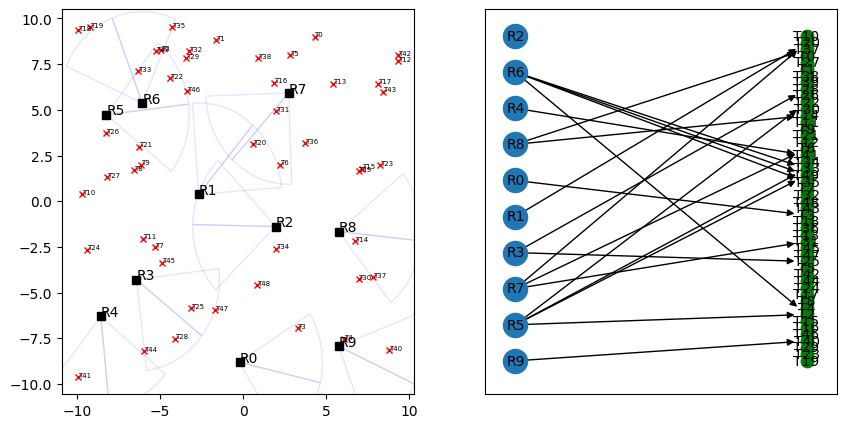

OutEdgeView([('R0', 'T3'), ('R1', 'T20'), ('R3', 'T25'), ('R3', 'T28'), ('R4', 'T41'), ('R5', 'T2'), ('R5', 'T22'), ('R5', 'T33'), ('R5', 'T49'), ('R6', 'T2'), ('R6', 'T33'), ('R6', 'T35'), ('R6', 'T49'), ('R7', 'T6'), ('R7', 'T20'), ('R7', 'T31'), ('R8', 'T14'), ('R8', 'T37'), ('R9', 'T40')])

In [2]:
system = System(10, 50)
system.plot_system()
G = system.G.copy()
G.edges()

Create a flow network of the FOV Graph and perform min cost max bipartite matching

In [27]:
net = RobotTargetGraph(G, False)
net.set_edge_attributes(
    {
        "capacity": 1,
        "distanceRd": {
            edge: int(round(dist, 4) * 1e5)
            for edge, dist in nx.get_edge_attributes(net.G, "distance").items()
        },
    }
)
FG = net.build_flow_network(
    {
        "capacity": 1,
        "distance": 0,
    }
)

Matching(sum_weights=26.95316743798061, edges=[('R0', 'T3'), ('R1', 'T20'), ('R3', 'T25'), ('R4', 'T41'), ('R5', 'T33'), ('R6', 'T49'), ('R7', 'T31'), ('R8', 'T14'), ('R9', 'T40')])


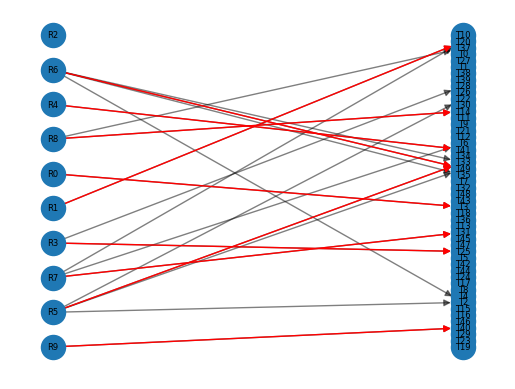

In [28]:
min_cost_maximum_bipartite_matching = net.maximum_flow_matching(min_cost=True, weight="distanceRd")
print(min_cost_maximum_bipartite_matching)
net.draw_flow(min_cost_maximum_bipartite_matching, True, {}, {"font_size":6, })

Add dummy nodes for all robots whose degree is greater than 1:  
Suppose robot `R1`'s out-edges are as follows:  
[(`R1`, `T1`), (`R1`, `T39`), (`R1`, `T14`)].  
Then, the these edges are replaced by:  
[(`R1x0`, `T1`), (`R1x1`, `T39`), (`R1x2`, `T14`)],  
and the node `R1` will be deleted.


In [3]:
net = RobotTargetGraph(G, True)
net.set_edge_attributes(
    {
        "capacity": 1,
        "distanceRd": {
            edge: int(round(dist, 4) * 1e5)
            for edge, dist in nx.get_edge_attributes(net.G, "distance").items()
        },
    }
)
FG = net.build_flow_network(
    {
        "capacity": 1,
        "distance": 0,
    }
)

Perform max flow matching

In [23]:
maximum_bipartite_matching = net.maximum_flow_matching(min_cost=False)
print(maximum_bipartite_matching)

Matching(sum_weights=48.85085487221296, edges=[('R9x0', 'T40'), ('R5x1', 'T22'), ('R7x0', 'T6'), ('R7x2', 'T31'), ('R3x0', 'T25'), ('R3x1', 'T28'), ('R1x0', 'T20'), ('R0x0', 'T3'), ('R8x0', 'T14'), ('R8x1', 'T37'), ('R4x0', 'T41'), ('R6x0', 'T2'), ('R6x1', 'T33'), ('R6x2', 'T35'), ('R6x3', 'T49')])


Plot flow network with dummy nodes

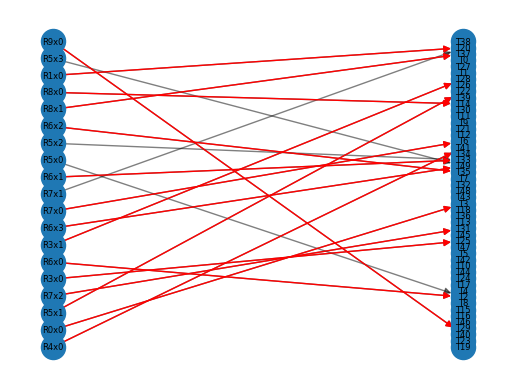

In [24]:
net.draw_flow(maximum_bipartite_matching, False, {}, {"font_size":6, })

Plot flow network with dummy nodes contracted back to their parent node

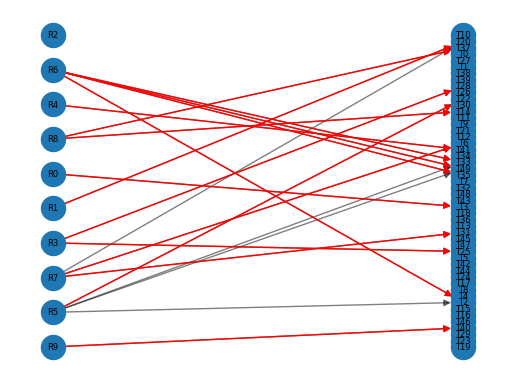

In [25]:
net.draw_flow(maximum_bipartite_matching, True, {}, {"font_size":6, })

Perform min cost max flow matching

Matching(sum_weights=48.091629816635226, edges=[('R9x0', 'T40'), ('R5x1', 'T22'), ('R7x0', 'T6'), ('R7x1', 'T20'), ('R7x2', 'T31'), ('R3x0', 'T25'), ('R3x1', 'T28'), ('R0x0', 'T3'), ('R8x0', 'T14'), ('R8x1', 'T37'), ('R4x0', 'T41'), ('R6x0', 'T2'), ('R6x1', 'T33'), ('R6x2', 'T35'), ('R6x3', 'T49')])


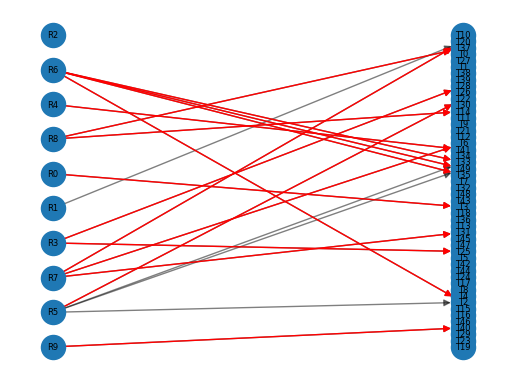

In [5]:
min_cost_maximum_bipartite_matching = net.maximum_flow_matching(min_cost=True, weight="distanceRd")
print(min_cost_maximum_bipartite_matching)
net.draw_flow(min_cost_maximum_bipartite_matching, True, {}, {"font_size":6, })

In [21]:
active_targets = set(target for target in net.targets if net.G.degree(target))
chosen_targets = set(target for _, target in min_cost_maximum_bipartite_matching.edges)
chosen_targets - active_targets, active_targets - chosen_targets

(set(), set())